In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix


In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df=df.sample(frac=1,random_state=42)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [4]:
test=df.tail(56962)
df=df.drop(test.index)
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213180,139142.0,1.832595,-0.584732,-0.819403,-0.149297,0.329139,1.313078,-0.593704,0.446035,1.045166,...,-0.298464,-0.616808,0.415845,-1.659516,-0.647589,-0.304438,0.044485,-0.062264,30.00,0
67,44.0,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,...,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
32212,36690.0,-0.584534,0.516797,2.690273,1.666086,-0.497783,0.712059,0.238978,0.218306,0.836184,...,-0.400695,-0.460325,-0.017198,0.375110,-0.138729,-0.416343,0.268763,-0.034817,29.45,0
139298,83093.0,1.003421,0.193060,1.620985,2.690939,-0.543496,0.913447,-0.657412,0.385481,-0.010028,...,0.001964,0.243906,0.133628,0.100668,0.123590,-0.006763,0.079287,0.034553,6.47,0
270149,163938.0,-0.236620,1.154627,-0.528508,-0.853377,0.848756,-0.221496,0.622917,0.336601,-0.319941,...,-0.257840,-0.676206,0.058260,-0.010006,-0.328057,0.155501,0.125989,0.035221,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166978,118418.0,0.039574,0.747010,0.098041,-0.806212,0.615727,-0.548374,0.838212,0.020500,-0.136691,...,-0.251461,-0.619013,0.005320,-0.523766,-0.486633,0.153365,0.237510,0.080317,1.98,0
251118,155226.0,-2.169007,1.869922,-1.706489,-0.672649,0.271257,-1.057522,0.184034,0.578133,1.108769,...,-0.491087,-1.070523,0.048976,0.463935,-0.252957,0.094892,0.081812,0.103395,8.99,0
13232,23276.0,-1.636799,-0.288001,3.044085,2.155079,-0.764045,0.924178,-0.724145,0.297774,2.620092,...,-0.193612,0.515240,0.016859,0.388790,-0.112184,-0.140346,-0.021988,0.143122,78.13,0
49834,44233.0,1.239340,-0.152563,-0.103219,-0.000806,-0.146956,-0.168999,-0.112986,0.119254,0.257984,...,-0.050855,-0.076214,-0.086878,-0.249568,0.432091,1.128364,-0.092260,-0.027886,2.00,0


In [6]:
train=df.sample(frac=0.8,random_state=42)
validation=df.drop(train.index)

In [7]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96376,65743.0,1.302477,-0.866397,0.785250,-0.597110,-1.518418,-0.499402,-0.994682,0.001884,-0.275751,...,-0.228542,-0.283978,-0.010913,0.052434,0.073435,1.128502,-0.036148,0.021291,48.00,0
35345,38079.0,-1.031103,1.818406,0.136551,0.698094,-0.094033,-0.366810,0.159960,0.693414,-0.883850,...,0.162482,0.384328,-0.167306,-0.419153,-0.018059,-0.276089,0.040598,0.089207,13.95,0
154874,103443.0,1.895993,-0.011263,-1.697574,0.535603,1.018850,0.184163,0.361167,-0.175396,1.694461,...,-0.006438,0.578767,0.063445,-1.033252,0.192139,-0.121096,-0.012608,-0.080000,33.00,0
224584,143870.0,0.053089,0.526993,1.286889,0.281747,-0.634208,0.134735,-0.868736,-1.569898,0.507947,...,1.658080,0.036417,-0.339205,0.062116,0.761358,0.882561,0.203204,0.223315,11.50,0
35871,38302.0,-0.196442,0.184731,1.951985,2.008439,-0.044212,1.298077,-0.426111,0.526389,0.336384,...,-0.255556,-0.299140,0.082896,-0.281839,-0.436925,-0.344782,0.172683,0.053057,14.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135689,81359.0,-1.931266,-1.011780,-0.612234,-0.299611,-2.330982,0.000028,3.265720,-0.010687,-0.526067,...,0.510387,0.207153,1.770508,0.381687,-0.152602,0.811349,-0.078503,0.216781,774.93,0
170267,120101.0,2.036483,0.107383,-1.505696,0.547835,0.086360,-1.196662,0.139343,-0.220991,0.588743,...,-0.340098,-0.920511,0.413173,1.028598,-0.356345,0.142460,-0.067796,-0.026925,2.58,0
267464,162784.0,1.762345,-0.845320,0.597132,0.702579,-1.642481,-0.298154,-1.217215,0.273943,1.415258,...,0.325413,0.920293,0.262379,0.553398,-0.669432,0.274798,0.006122,-0.027950,59.90,0
126976,78165.0,-0.463816,1.393423,2.264570,3.267127,0.265986,0.238790,0.696579,0.118520,-1.505531,...,-0.205537,-0.571200,-0.044516,0.333909,-0.107701,-0.227733,0.058558,0.071475,11.34,0


In [8]:
validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
134976,81055.0,-1.593002,0.756803,1.274002,0.244127,0.335045,0.272886,0.389542,0.676944,-0.579539,...,0.031681,-0.063355,-0.268928,-0.321186,0.681500,-0.390287,-0.195158,-0.039483,43.50,0
246697,153290.0,-3.608205,-1.471144,0.327140,0.149964,3.666915,-2.701360,-1.340508,-0.522986,1.115929,...,-0.746814,-0.033316,-1.690792,1.249015,-0.608078,0.326580,0.991899,-0.059786,8.54,0
68279,52913.0,0.676855,1.587029,-1.508147,1.443815,1.316790,-1.160342,1.149049,-0.419393,-0.090565,...,-0.191418,0.101451,0.058298,-0.135311,-0.604406,-0.452763,0.046430,-0.383642,0.89,0
26525,34118.0,1.453447,-0.974690,-0.134962,-1.418547,-1.057755,-0.948851,-0.461141,-0.350840,-2.149149,...,-0.556625,-1.398363,0.089571,-0.177538,0.290735,-0.504811,-0.000739,0.025708,76.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139747,83329.0,-2.654861,-2.573636,2.982088,0.177964,0.196961,-0.464111,-0.467951,0.247670,1.446265,...,0.158013,0.104976,0.650700,0.476358,0.522876,1.031481,-0.059338,-0.041721,284.14,0
218891,141514.0,-1.266761,0.567688,-1.137906,1.140781,0.687028,-0.672608,0.229731,0.582142,-0.896083,...,0.529202,1.416237,0.357878,0.650359,-0.822816,-0.499649,0.094544,-0.153482,6.17,0
160717,113577.0,-0.406916,0.495423,-0.222752,-0.790593,0.824570,-1.255726,1.245641,-0.229602,0.276791,...,-0.027158,-0.066620,0.205440,-0.136297,-0.761071,-0.340946,0.185565,0.269985,84.65,0
281540,170250.0,-3.296875,2.924985,-2.237114,-0.999462,-0.247988,-1.252690,0.063705,0.683266,1.594078,...,0.046986,0.280853,-0.069211,0.613813,0.330438,0.590084,0.103159,0.648336,6.00,0


In [9]:
# Data Cleaning

#normalising
for column in train.columns:
    train[column] =train[column]/ train[column].abs().max()

train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96376,0.380484,0.027798,-0.014329,0.023314,-0.035384,-0.037559,-0.020880,-0.022578,0.000026,-0.017682,...,-0.006562,-0.027038,-0.000244,0.013055,0.007133,0.320839,-0.001602,0.000941,0.002538,0.0
35345,0.220380,-0.022006,0.030074,0.004054,0.041368,-0.002326,-0.015336,0.003631,0.009471,-0.056675,...,0.004665,0.036592,-0.003734,-0.104362,-0.001754,-0.078493,0.001799,0.003944,0.000738,0.0
154874,0.598670,0.040465,-0.000186,-0.050402,0.031739,0.025202,0.007700,0.008198,-0.002396,0.108654,...,-0.000185,0.055104,0.001416,-0.257262,0.018663,-0.034428,-0.000559,-0.003537,0.001745,0.0
224584,0.832639,0.001133,0.008716,0.038208,0.016696,-0.015687,0.005633,-0.019720,-0.021442,0.032571,...,0.047604,0.003467,-0.007570,0.015466,0.073951,0.250917,0.009005,0.009872,0.000608,0.0
35871,0.221670,-0.004193,0.003055,0.057955,0.119016,-0.001094,0.054272,-0.009672,0.007189,0.021570,...,-0.007337,-0.028481,0.001850,-0.070173,-0.042439,-0.098023,0.007652,0.002346,0.000791,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135689,0.470860,-0.041218,-0.016733,-0.018177,-0.017754,-0.057658,0.000001,0.074129,-0.000146,-0.033733,...,0.014653,0.019723,0.039513,0.095033,-0.014822,0.230671,-0.003479,0.009584,0.040980,0.0
170267,0.695077,0.043463,0.001776,-0.044705,0.032464,0.002136,-0.050032,0.003163,-0.003018,0.037752,...,-0.009764,-0.087642,0.009221,0.256103,-0.034612,0.040502,-0.003004,-0.001190,0.000136,0.0
267464,0.942102,0.037613,-0.013980,0.017729,0.041633,-0.040628,-0.012466,-0.027630,0.003742,0.090751,...,0.009343,0.087621,0.005856,0.137786,-0.065022,0.078127,0.000271,-0.001236,0.003168,0.0
126976,0.452375,-0.009899,0.023045,0.067236,0.193604,0.006579,0.009984,0.015812,0.001619,-0.096539,...,-0.005901,-0.054384,-0.000993,0.083138,-0.010461,-0.064746,0.002595,0.003160,0.000600,0.0


In [10]:
# Test Data
for column in test.columns:
    test[column] = test[column]  / test[column].abs().max()

test

/tmp/ipykernel_40945/2532181002.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[column] = test[column]  / test[column].abs().max()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213180,0.805285,0.032488,-0.008041,-0.016956,-0.008932,0.002894,0.017913,-0.004923,0.010867,0.078465,...,-0.013092,-0.056416,0.018459,-0.361980,-0.092173,-0.089131,0.001407,-0.001840,0.001168,0.0
67,0.000255,-0.016822,0.003416,0.061187,0.168331,0.001280,-0.000373,0.001109,-0.007493,-0.009403,...,-0.003669,0.038058,0.009212,0.156191,-0.085729,-0.018805,-0.009966,-0.008050,0.000029,0.0
32212,0.212344,-0.010363,0.007107,0.055670,0.099673,-0.004376,0.009714,0.001982,0.005319,0.062776,...,-0.017576,-0.042104,-0.000763,0.081821,-0.019746,-0.121893,0.008502,-0.001029,0.001146,0.0
139298,0.480901,0.017789,0.002655,0.033543,0.160984,-0.004778,0.012461,-0.005452,0.009392,-0.000753,...,0.000086,0.022309,0.005932,0.021958,0.017591,-0.001980,0.002508,0.001021,0.000252,0.0
270149,0.948792,-0.004195,0.015879,-0.010936,-0.051053,0.007462,-0.003022,0.005166,0.008201,-0.024019,...,-0.011310,-0.061849,0.002586,-0.002183,-0.046693,0.045526,0.003985,0.001041,0.000077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.437640,0.020804,0.001386,0.010150,0.027615,-0.002606,-0.002908,-0.001370,0.002905,-0.008573,...,-0.008160,-0.052527,0.007165,-0.001339,0.013016,0.031981,-0.000662,0.000117,0.000077,0.0
259178,0.920213,-0.013757,0.001981,-0.023640,-0.074249,0.017059,0.053370,-0.003865,0.033150,0.030082,...,0.001626,-0.001790,0.010734,0.148939,-0.232730,-0.225709,0.002088,0.004049,0.003473,0.0
131932,0.461814,-0.002599,0.013655,0.031548,0.029061,0.003071,-0.011121,0.008928,-0.009631,-0.036884,...,0.002309,0.032387,-0.012926,0.087871,0.033787,-0.116660,-0.003832,-0.005796,0.000153,0.0
146867,0.508901,-0.052274,0.032384,-0.052171,-0.227268,0.016408,0.037212,-0.003912,0.054028,0.043558,...,-0.014596,-0.095811,0.006362,0.148078,0.045505,0.124811,0.015719,0.009922,0.000039,0.0


In [11]:
#Validation Data
for column in validation.columns:
    validation[column] = validation[column]/validation[column].abs().max()

validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101565,0.392831,-0.019456,-0.001542,0.045199,-0.161343,-0.027310,0.011065,-0.037927,-0.059441,0.107783,...,-0.045276,0.028937,-0.016843,-0.009587,0.230201,-0.213705,0.002551,0.011182,0.011376,0.0
134976,0.469090,-0.048327,0.020369,0.038647,0.023332,0.007949,0.011614,0.010621,0.017239,-0.053451,...,0.001165,-0.007129,-0.012178,-0.079840,0.112258,-0.125245,-0.016059,-0.002448,0.004949,0.0
246697,0.887136,-0.109463,-0.039596,0.009924,0.014333,0.087001,-0.114968,-0.036549,-0.013319,0.102922,...,-0.027454,-0.003749,-0.076563,0.310479,-0.100164,0.104801,0.081622,-0.003707,0.000972,0.0
68279,0.306224,0.020534,0.042715,-0.045749,0.137992,0.031242,-0.049383,0.031329,-0.010680,-0.008353,...,-0.007037,0.011416,0.002640,-0.033636,-0.099559,-0.145293,0.003821,-0.023785,0.000101,0.0
26525,0.197451,0.044094,-0.026234,-0.004094,-0.135577,-0.025096,-0.040382,-0.012573,-0.008935,-0.198215,...,-0.020462,-0.157349,0.004056,-0.044132,0.047890,-0.161996,-0.000061,0.001594,0.008646,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139747,0.482250,-0.080541,-0.069269,0.090461,0.017009,0.004673,-0.019752,-0.012759,0.006307,0.133388,...,0.005809,0.011812,0.029465,0.118413,0.086129,0.331006,-0.004883,-0.002587,0.032324,0.0
218891,0.818985,-0.038430,0.015279,-0.034518,0.109030,0.016300,-0.028626,0.006264,0.014825,-0.082645,...,0.019454,0.159360,0.016206,0.161666,-0.135536,-0.160339,0.007780,-0.009516,0.000702,0.0
160717,0.657305,-0.012345,0.013334,-0.006757,-0.075561,0.019564,-0.053443,0.033962,-0.005847,0.025528,...,-0.000998,-0.007496,0.009303,-0.033881,-0.125365,-0.109411,0.015270,0.016738,0.009630,0.0
281540,0.985289,-0.100018,0.078726,-0.067863,-0.095523,-0.005884,-0.053313,0.001737,0.017400,0.147021,...,0.001727,0.031603,-0.003134,0.152581,0.054430,0.189360,0.008489,0.040195,0.000683,0.0


In [12]:
model = LogisticRegression()

In [13]:
model.fit(train.drop('Class',axis=1),train['Class'])

LogisticRegression()

In [14]:
predictions = model.predict(test.drop('Class',axis=1))

In [15]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
print(classification_report(test['Class'], predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56857
         1.0       0.84      0.64      0.72       105

    accuracy                           1.00     56962
   macro avg       0.92      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
classifier = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=100,activation = 'relu',solver='adam',random_state=42)

In [18]:
X_train=train.drop('Class',axis=1)

In [19]:
Y_train=train['Class']

In [20]:
classifier.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=100, random_state=42)

In [21]:
X_val=validation.drop('Class',axis=1)
y_val=validation['Class']
y_pred = classifier.predict(X_val)

In [22]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [24]:
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_val)
print("Accuracy of MLPClassifier : ''", accuracy(cm))

Accuracy of MLPClassifier : '' 0.9990783207882552


In [25]:
cm

array([[45463,    20],
       [   22,    64]])

In [26]:
precision=(cm[0][0])/(cm[0][0]+cm[0][1])
recall=(cm[0][0])/(cm[0][0]+cm[1][0])

In [27]:
print("Precision: ",precision)
print("Recall: ",recall)

Precision:  0.9995602752676824
Recall:  0.9995163240628778


In [28]:
classifier25 = MLPClassifier(hidden_layer_sizes=(10,2), max_iter=25,activation = 'relu',solver='adam',random_state=42)

In [29]:
X_train=train.drop('Class',axis=1)
Y_train=train['Class']
X_val=validation.drop('Class',axis=1)
y_val=validation['Class']

In [30]:
classifier25.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2), max_iter=25, random_state=42)

In [31]:
y_pred = classifier25.predict(X_val)
cm_25 = confusion_matrix(y_pred, y_val)
print(cm_25)

[[45463    20]
 [   22    64]]


In [32]:
precision_25=(cm[0][0])/(cm[0][0]+cm[0][1])
recall_25=(cm[0][0])/(cm[0][0]+cm[1][0])
print("Precision: ",precision_25)
print("Recall: ",recall_25)

Precision:  0.9995602752676824
Recall:  0.9995163240628778


In [33]:
classifier500 = MLPClassifier(hidden_layer_sizes=(30,5), max_iter=500,activation = 'relu',solver='adam',random_state=42)

In [34]:
classifier500.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(30, 5), max_iter=500, random_state=42)

In [35]:
y_pred = classifier500.predict(X_val)
cm_500 = confusion_matrix(y_pred, y_val)
print(cm_500)

[[45479    22]
 [    6    62]]


In [36]:
precision_500=(cm_500[0][0])/(cm_500[0][0]+cm_500[0][1])
recall_500=(cm_500[0][0])/(cm_500[0][0]+cm_500[1][0])
print("Precision: ",precision_500)
print("Recall: ",recall_500)

Precision:  0.9995164941429858
Recall:  0.9998680883807849


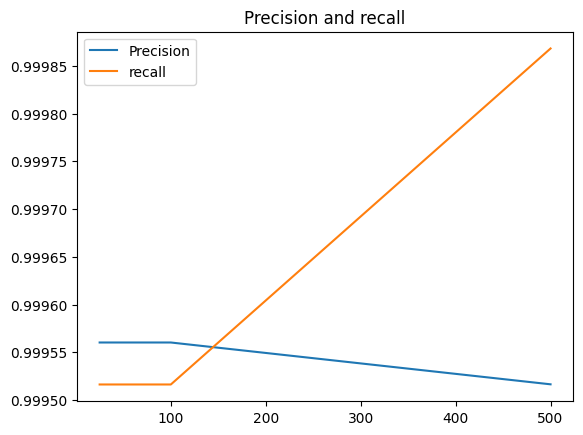

In [37]:
p = [precision_25, precision, precision_500]
r = [recall_25, recall, recall_500]
val = [25, 100, 500]
plt.plot(val, p)
plt.plot(val, r)
plt.title("Precision and recall")
plt.legend(["Precision", "recall"])
plt.show()
